In [170]:
# Campo para simulação

import matplotlib.pyplot as plt
import numpy as np

class Campo:
    def __init__(self, pDim=100):
        self.dim= pDim
        self.vidas = []

    def mostra(self):
        grade = np.zeros( (self.dim,self.dim), dtype=int )
        for vi in self.vidas:
            grade[ vi.x ][ vi.y ] = 1
        plt.imshow(grade.transpose(), cmap='binary')
        plt.xticks([]), plt.yticks([])  # Hide the tick labels
        plt.show() 
    def livre(self, px,py):
        for vi in self.vidas:
            if vi.x==px and vi.y==py:
                return False
        return True
    def criaSer(self, n=1, pDir=0b1111):
        
        for i in range(n):
            while(True):
                tX = int(np.random.rand()*self.dim)
                tY = int(np.random.rand()*self.dim)
                if self.livre( tX,tY ):
                    self.vidas.append( Ser( self, tX,tY, pDir ) )
                    break
    def tique(self, n=1):
        for i in range(n):
            for vi in self.vidas:
                vi.passo()
    def duplicaPop(self):
        for i in range( len(self.vidas) ):
            self.vidas[i].duplica()
        
class Ser:
    def __init__(self, pCampo, pX, pY, pDir):
        self.campo = pCampo
        self.x = pX
        self.y = pY
        
        if int(np.random.rand()*100) < 5:
            muta = int(np.random.rand()*4)
            if muta==0:
                self.direcoes = pDir ^ 0b1000  # inverte bit para cima 0b1000
            elif muta==1:
                self.direcoes = pDir ^ 0b0100 # inverte bit para baixo 0b0100
            elif muta==2:
                self.direcoes = pDir ^ 0b0010 # inverte bit para direita 0b0010
            elif muta==3:
                self.direcoes = pDir ^ 0b0001 # inverte bit para esquerda 0b0001
        else:
            self.direcoes = pDir 
    def __repr__(self):
        return "(%d,%d)"%(self.x,self.y)
    def passo(self):
        d = int( np.random.rand()*4 ) # direção aleatória 0 - cima, 1- baixo, 2- direita, 3-esquerda
        if d==0:
            if self.campo.livre(self.x,self.y-1)  and (self.direcoes & 0b1000):
                if self.y-1<0: return
                self.y = self.y-1
        elif d==1:
            if self.campo.livre(self.x,self.y+1)  and (self.direcoes & 0b0100):                
                if self.y+1>=self.campo.dim: return
                self.y = self.y+1
        elif d==2:
            if self.campo.livre(self.x+1,self.y)  and (self.direcoes & 0b0010):
                if self.x+1>=self.campo.dim: return
                self.x=self.x+1
        elif d==3:
            if self.campo.livre(self.x-1,self.y)  and (self.direcoes & 0b0001):
                if self.x-1<0:return
                self.x=self.x-1
    def duplica(self):
        self.campo.criaSer(1,self.direcoes)



In [171]:
c = Campo()

In [172]:
c.criaSer(100)

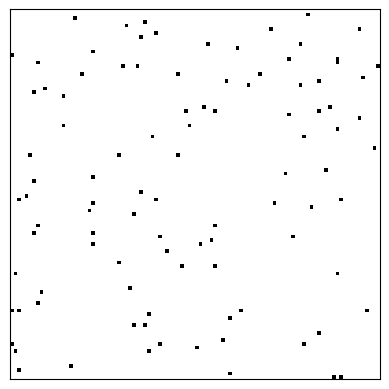

In [173]:
c.mostra()

In [178]:
c.duplicaPop()

In [179]:
len(c.vidas)

400

In [176]:
c.tique(1000)

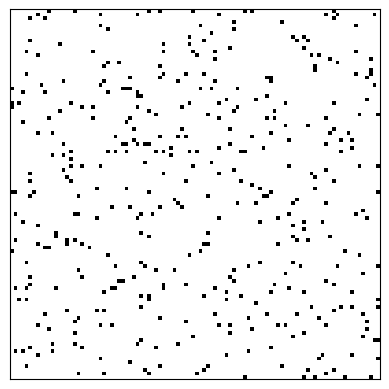

In [180]:
c.mostra()

In [114]:
0b1111

15

In [120]:
0b0111 & 0b1000

0

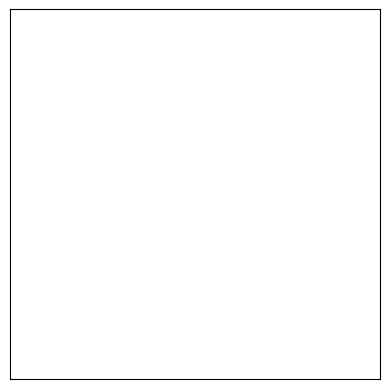

In [80]:
c.mostra()

In [21]:
g = np.zeros( (10,10),dtype=int)

In [22]:
g[1][5] = 1

In [23]:
g

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [24]:
g.transpose()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])